In [1]:
import pandas as pd 
from simpledbf import Dbf5
#from IPython.core.display import HTML
pd.options.display.float_format = '{:,.5f}'.format
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df17 = pd.read_csv('df17.csv',index_col=0)
df07 = pd.read_csv('df07.csv',index_col=0)
df97 = pd.read_csv('df97.csv',index_col=0)
dftrabalho17 = pd.read_csv('dftrabalho17.csv',index_col=0)
dftrabalho07 = pd.read_csv('dftrabalho07.csv',index_col=0)
dftrabalho97 = pd.read_csv('dftrabalho97.csv',index_col=0)

C:\Users\Erika\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
conditions = [
    (dftrabalho17['tipvg'].isin(['Coletivo','Individual'])),
    (dftrabalho17['tipvg'].isin(['A pé','Bicicleta'])),
    ]
choices = ['motorizado','não-motorizado']   
dftrabalho17['modovig'] = np.select(conditions, choices)
conditions = [
    (dftrabalho07['tipvg'].isin(['Coletivo','Individual'])),
    (dftrabalho07['tipvg'].isin(['A pé','Bicicleta'])),
    ]
dftrabalho07['modovig'] = np.select(conditions, choices)
conditions = [
    (dftrabalho97['tipvg'].isin(['Coletivo','Individual'])),
    (dftrabalho97['tipvg'].isin(['A pé','Bicicleta'])),
    ]
dftrabalho97['modovig'] = np.select(conditions, choices)   

# Gráfico 3-1
COMPARAÇÃO DE DISTRIBUIÇÃO PERCENTUAL DE VIAGENS DIÁRIAS POR MOTIVO DE TRABALHO POR TIPO DE VIAGEM (1997,2007,2017)


Text(0.5, 1.0, 'COMPARAÇÃO DE DISTRIBUIÇÃO PERCENTUAL DE VIAGENS DIÁRIAS POR MOTIVO DE TRABALHO POR TIPO DE VIAGEM (1997,2007,2017)')

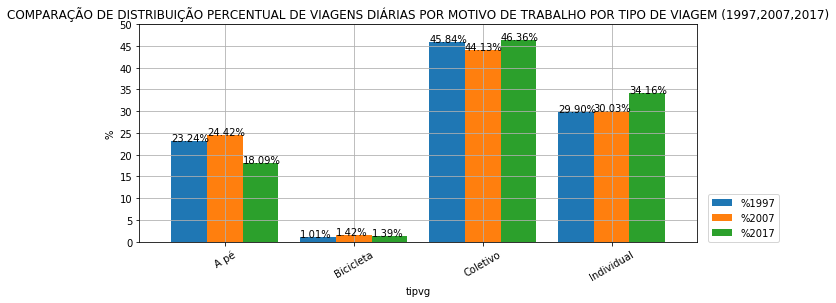

In [17]:
dftrabalho17tipotra = dftrabalho17[['tipvg','fe_via']].groupby(['tipvg']).sum().reset_index()
dftrabalho17tipotra['%2017'] = (dftrabalho17tipotra['fe_via']/dftrabalho17tipotra['fe_via'].sum())*100
dftrabalho07tipotra = dftrabalho07[['tipvg','fe_via']].groupby(['tipvg']).sum().reset_index()
dftrabalho07tipotra['%2007'] = (dftrabalho07tipotra['fe_via']/dftrabalho07tipotra['fe_via'].sum())*100
dftrabalho97tipotra = dftrabalho97[['tipvg','fe_via']].groupby(['tipvg']).sum().reset_index()
dftrabalho97tipotra['%1997'] = (dftrabalho97tipotra['fe_via']/dftrabalho97tipotra['fe_via'].sum())*100

dftrabalho_tipotra = pd.merge((pd.merge(dftrabalho97tipotra[['tipvg','%1997']],dftrabalho07tipotra[['tipvg','%2007']],
                                  on = 'tipvg', how = 'inner')),dftrabalho17tipotra[['tipvg','%2017']], on = 'tipvg', how = 'inner')
fig, ax = plt.subplots(1, 1)
dftrabalho_tipotra.plot.bar(ax = ax,figsize = (10,4),x = 'tipvg', grid = True, width = 0.83)
for p in ax.patches:
                ax.annotate(str("%.2f" %p.get_height())+"%", (p.get_x(), p.get_height()))

plt.legend(loc=[1.02, 0])
plt.ylabel('%')
plt.yticks([0,5,10,15,20,25,30,35,40,45,50])
plt.xticks(rotation = 30)
plt.title("COMPARAÇÃO DE DISTRIBUIÇÃO PERCENTUAL DE VIAGENS DIÁRIAS POR MOTIVO DE TRABALHO POR TIPO DE VIAGEM (1997,2007,2017)")


# Gráfico-3-2
COMPARAÇÃO DE TEMPO DE DESLOCAMENTO MÉDIO DE VIAGEM (MINUTOS)(POR MOTIVO DE TRABALHO) POR TIPO DE VIAGEM (1997,2007,2017)


Text(0.5, 1.0, 'COMPARAÇÃO DE TEMPO DE DESLOCAMENTO MÉDIO DE VIAGEM (MINUTOS)(POR MOTIVO DE TRABALHO) POR TIPO DE VIAGEM (1997,2007,2017)')

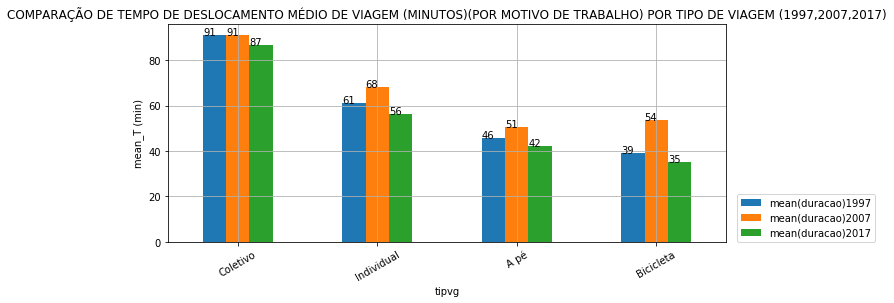

In [4]:
dftrabalho_tipo17 = dftrabalho17[['tipvg','duracao']].drop_duplicates()
dftrabalho_tipo17 = dftrabalho_tipo17[['tipvg','duracao']].groupby('tipvg').mean().reset_index()
dftrabalho_tipo17= dftrabalho_tipo17.rename(columns = {'duracao':'mean(duracao)2017'})
dftrabalho_tipo07 = dftrabalho07[['tipvg','duracao']].drop_duplicates()
dftrabalho_tipo07 = dftrabalho_tipo07[['tipvg','duracao']].groupby('tipvg').mean().reset_index()
dftrabalho_tipo07= dftrabalho_tipo07.rename(columns = {'duracao':'mean(duracao)2007'})
dftrabalho_tipo97 = dftrabalho97[['tipvg','duracao']].drop_duplicates()
dftrabalho_tipo97 = dftrabalho_tipo97[['tipvg','duracao']].groupby('tipvg').mean().reset_index()
dftrabalho_tipo97= dftrabalho_tipo97.rename(columns = {'duracao':'mean(duracao)1997'})



dftrabalho_tipo = pd.merge((pd.merge(dftrabalho_tipo97,dftrabalho_tipo07, 
                                  on = 'tipvg', how = 'inner')),
                        dftrabalho_tipo17, on = 'tipvg', how = 'inner')
fig, ax = plt.subplots(1, 1)
dftrabalho_tipo\
.sort_values(by=[ 'mean(duracao)2017','mean(duracao)2007','mean(duracao)1997'],ascending=False)\
.plot.bar(ax = ax,figsize = (10,4), x = 'tipvg',grid = True)
for p in ax.patches:
                 ax.annotate(str("%.0f" %p.get_height()), (p.get_x(), p.get_height()))
plt.legend(loc=[1.02, 0])
plt.xticks(rotation = 30)
plt.ylabel('mean_T (min)')
plt.title("COMPARAÇÃO DE TEMPO DE DESLOCAMENTO MÉDIO DE VIAGEM (MINUTOS)(POR MOTIVO DE TRABALHO) POR TIPO DE VIAGEM (1997,2007,2017)")

# Gráfico4-1
DISTRIBUIÇÃO PERCENTUAL DE CRITÉRIOS DE CLASSIFICAÇÃO ECONÔMICA  (2017, 2007,1997)


Text(0.5, 1.0, 'DISTRIBUIÇÃO PERCENTUAL DE CRITÉRIOS DE CLASSIFICAÇÃO ECONÔMICA  (1997,2007,2017)')

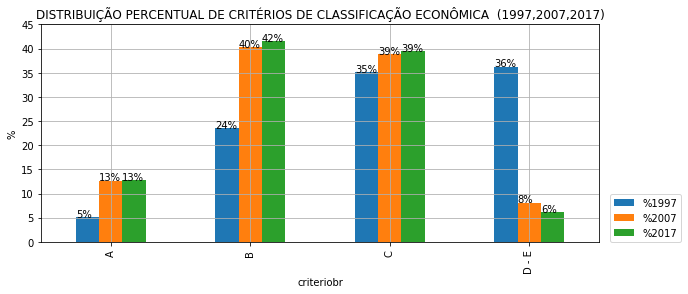

In [6]:
df_criterior97 = df97[['id_fam','criteriobr','count']].drop_duplicates()
df_criterior97 = df_criterior97[['criteriobr','count']].groupby('criteriobr').sum().reset_index()
df_criterior97['%1997'] = (df_criterior97['count']/df_criterior97['count'].sum())*100

df_criterior07 = df07[['id_fam','criteriobr','count']].drop_duplicates()
df_criterior07 = df_criterior07[['criteriobr','count']].groupby('criteriobr').sum().reset_index()
df_criterior07['%2007'] = (df_criterior07['count']/df_criterior07['count'].sum())*100


df_criterior17 = df17[['id_fam','criteriobr','count']].drop_duplicates()
df_criterior17 = df_criterior17[['criteriobr','count']].groupby('criteriobr').sum().reset_index()
df_criterior17['%2017'] = (df_criterior17['count']/df_criterior17['count'].sum())*100

df_criterior = pd.merge((pd.merge(df_criterior97[['criteriobr','%1997']],df_criterior07[['criteriobr','%2007']],
                                  on = 'criteriobr', how = 'inner')),df_criterior17[['criteriobr','%2017']], on = 'criteriobr', how = 'inner')
fig, ax = plt.subplots(1, 1)
df_criterior.plot.bar(ax = ax,figsize = (10,4),x = 'criteriobr', grid = True)
for p in ax.patches:
                ax.annotate(str("%.0f" %p.get_height())+"%", (p.get_x(), p.get_height()))
plt.legend(loc=[1.02, 0])
plt.yticks([0,5,10,15,20,25,30,35,40,45])
plt.ylabel('%')
plt.title("DISTRIBUIÇÃO PERCENTUAL DE CRITÉRIOS DE CLASSIFICAÇÃO ECONÔMICA  (1997,2007,2017)")


# Gráfico4-2
DISTRIBUIÇÃO PERCENTUAL DE TIPOS DE VIAGENS COMO TRABALHO POR CRITERIOBR 2017 2007 1997


<Figure size 432x288 with 0 Axes>

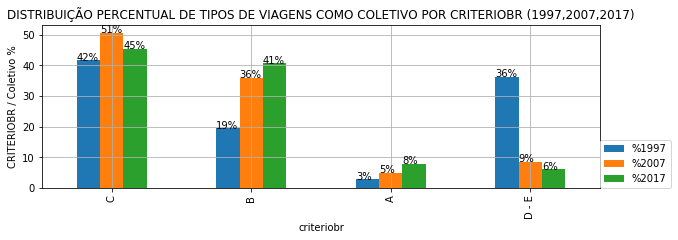

In [53]:
a = 1
for nivel in list(df17['tipvg'].unique()):
  if nivel =='Coletivo':
    plt.figure(a)
    dftipcri17 = df17[['tipvg','criteriobr','count']][df17['tipvg']== nivel].groupby(['criteriobr','tipvg'])\
   .sum()
    dftipcri17['%2017'] = (dftipcri17['count']/dftipcri17['count'].sum())*100
    dftipcri07 = df07[['tipvg','criteriobr','count']][df07['tipvg']== nivel].groupby(['criteriobr','tipvg'])\
    .sum()
    dftipcri07['%2007'] = (dftipcri07['count']/dftipcri07['count'].sum())*100
    dftipcri97 = df97[['tipvg','criteriobr','count']][df97['tipvg']== nivel].groupby(['criteriobr','tipvg'])\
   .sum()
    dftipcri97['%1997'] = (dftipcri97['count']/dftipcri97['count'].sum())*100
    dftipcri = pd.merge((pd.merge(dftipcri97[['%1997']],
                                  dftipcri07[['%2007']],
                                     on = ['criteriobr','tipvg'], how = 'inner')),
                        dftipcri17[['%2017']], on = ['criteriobr','tipvg'], how = 'inner')\
   .sort_values(by=['%2017'],ascending=False).reset_index()
    
    fig, ax = plt.subplots(1, 1)
    if nivel == "D - E":
         dftipcri.plot.bar(ax = ax,figsize = (15,3),x = 'criteriobr',grid = True)    
    else:        
        dftipcri.plot.bar(ax = ax,figsize = (10,3),x = 'criteriobr',grid = True)        
    for p in ax.patches:
                     ax.annotate(str("%.0f" %p.get_height())+"%", (p.get_x(), p.get_height()))
    plt.legend(loc=[1, 0]) 

    plt.ylabel('CRITERIOBR / {} %'.format(nivel))
    plt.title("DISTRIBUIÇÃO PERCENTUAL DE TIPOS DE VIAGENS COMO {} POR CRITERIOBR (1997,2007,2017)".format(nivel.upper())) 
    a+=1
    plt.show()

# Gráfico4-3
DISTRIBUIÇÃO PERCENTUAL DE CRITERIOBR A POR TIPO DE VIAGENS DIÁRIAS (1997,2007,2017)



<Figure size 432x288 with 0 Axes>

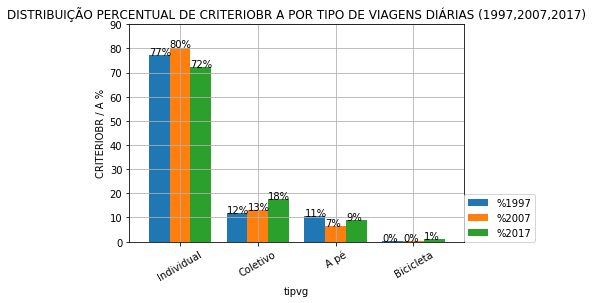

<Figure size 432x288 with 0 Axes>

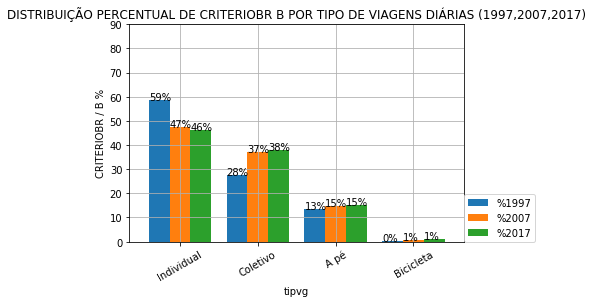

<Figure size 432x288 with 0 Axes>

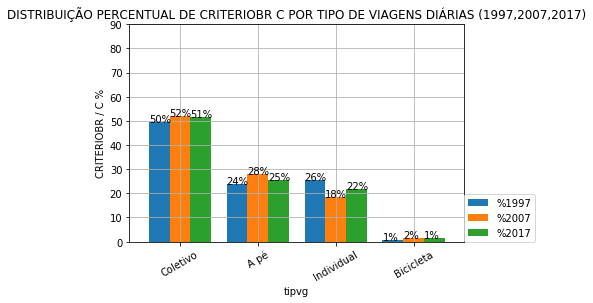

<Figure size 432x288 with 0 Axes>

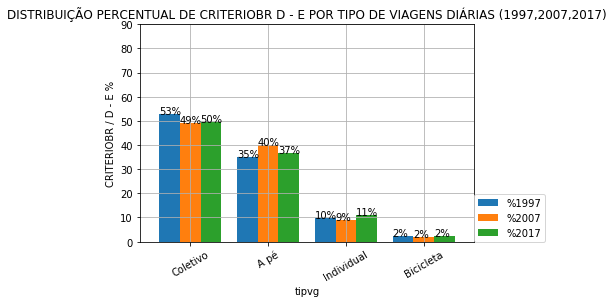

In [3]:
a = 1
for nivel in ['A','B','C','D - E']:
  #if nivel == 'A':
    plt.figure(a)
    dftrabalhotipcri17 = dftrabalho17[['tipvg','criteriobr','count']][dftrabalho17['criteriobr']== nivel].groupby(['criteriobr','tipvg'])\
   .sum()
    dftrabalhotipcri17['%2017'] = (dftrabalhotipcri17['count']/dftrabalhotipcri17['count'].sum())*100
    dftrabalhotipcri07 = dftrabalho07[['tipvg','criteriobr','count']][dftrabalho07['criteriobr']== nivel].groupby(['criteriobr','tipvg'])\
    .sum()
    dftrabalhotipcri07['%2007'] = (dftrabalhotipcri07['count']/dftrabalhotipcri07['count'].sum())*100
    dftrabalhotipcri97 = dftrabalho97[['tipvg','criteriobr','count']][dftrabalho97['criteriobr']== nivel].groupby(['criteriobr','tipvg'])\
   .sum()
    dftrabalhotipcri97['%1997'] = (dftrabalhotipcri97['count']/dftrabalhotipcri97['count'].sum())*100
    dftrabalhotipcri = pd.merge((pd.merge(dftrabalhotipcri97[['%1997']],
                                  dftrabalhotipcri07[['%2007']],
                                     on = ['criteriobr','tipvg'], how = 'inner')),
                        dftrabalhotipcri17[['%2017']], on = ['criteriobr','tipvg'], how = 'inner')\
   .sort_values(by=['%2017'],ascending=False).reset_index()
    
    fig, ax = plt.subplots(1, 1)
    if nivel == "D - E":
         dftrabalhotipcri.plot.bar(ax = ax,x = 'tipvg',grid = True,width = 0.8)    
    else:        
        dftrabalhotipcri.plot.bar(ax = ax,x = 'tipvg',grid = True,width = 0.8)           
    for p in ax.patches:
                     ax.annotate(str("%.0f" %p.get_height())+"%", (p.get_x(), p.get_height()))
    plt.legend(loc=[1, 0]) 
    plt.yticks([0,10,20,30,40,50,60,70,80,90])
    plt.xticks(rotation = 30)
    plt.ylabel('CRITERIOBR / {} %'.format(nivel))
    plt.title("DISTRIBUIÇÃO PERCENTUAL DE CRITERIOBR {} POR TIPO DE VIAGENS DIÁRIAS (1997,2007,2017)".format(nivel)) 
    a+=1
    plt.show()

# Gráfico5-4, Gráfico5-5
DISTANCIA DE DESLOCAMENTOS PENDULARES (METROS)) X (O VALOR DE RENDA FAMILIAR 2007, 2017)


Text(0.5, 1.0, '(DISTANCIA DE DESLOCAMENTOS PENDULARES (METROS)) X (O VALOR DE RENDA FAMILIAR 2017)')

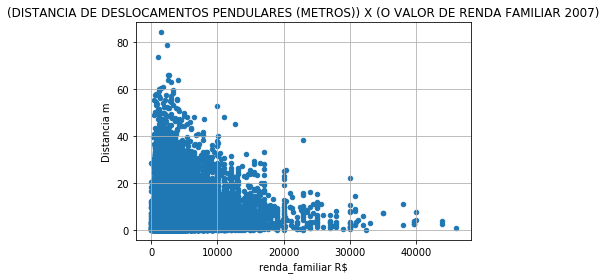

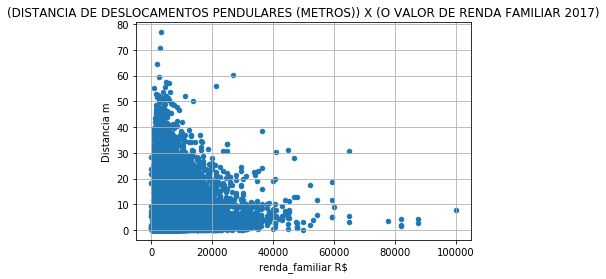

In [44]:
df_tipo07 = dftrabalho07[['id_fam','renda_fa','dist_ori_des']].drop_duplicates()
df_tipo07 = df_tipo07[['renda_fa','dist_ori_des']].plot.scatter(x = 'renda_fa',y = 'dist_ori_des',grid = True)

plt.ylabel('Distancia m')
plt.xlabel('renda_familiar R$')
plt.title("(DISTANCIA DE DESLOCAMENTOS PENDULARES (METROS)) X (O VALOR DE RENDA FAMILIAR 2007)")
df_tipo17 = dftrabalho17[['id_fam','renda_fa','dist_ori_des']].drop_duplicates()
df_tipo17 = df_tipo17[['renda_fa','dist_ori_des']].plot.scatter(x = 'renda_fa',y = 'dist_ori_des',grid = True)

plt.ylabel('Distancia m')
plt.xlabel('renda_familiar R$')

plt.title("(DISTANCIA DE DESLOCAMENTOS PENDULARES (METROS)) X (O VALOR DE RENDA FAMILIAR 2017)")


# Gráfico5-1, Gráfico5-2, Gráfico5-3, 
RELAÇÃO ENTRE TEMPO DE DESLOCAMENTOS PENDULARES (MINUTO) E O VALOR DE RENDA FAMILIAR 1997

Text(0.5, 1.0, 'RELAÇÃO ENTRE TEMPO DE DESLOCAMENTOS PENDULARES (MINUTO) E O VALOR DE RENDA FAMILIAR 1997')

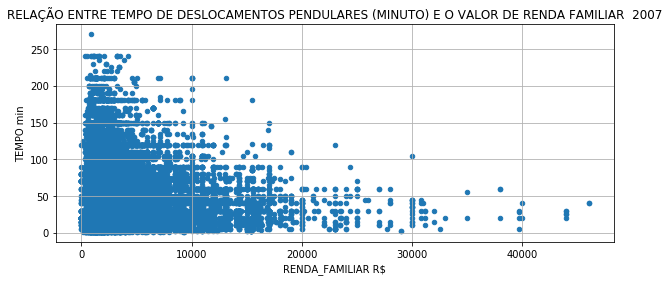

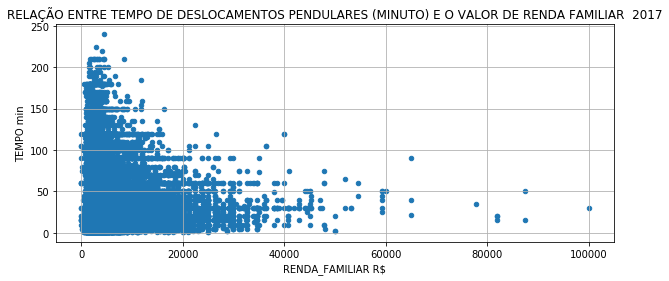

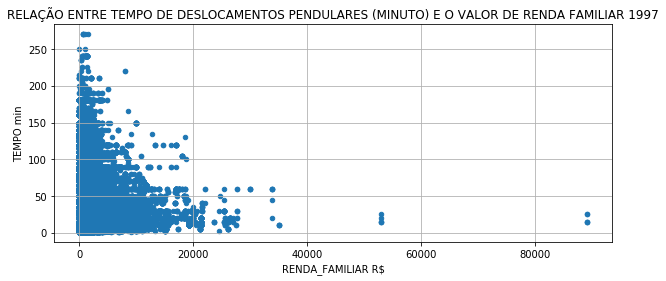

In [202]:
df_tipo07 = dftrabalho07[['id_fam','renda_fa','duracao']]
df_tipo07 = df_tipo07[['renda_fa','duracao']].plot.scatter(figsize = (10,4),x = 'renda_fa',y = 'duracao',grid = True)
plt.ylabel('TEMPO min')
plt.xlabel('RENDA_FAMILIAR R$')
plt.title("RELAÇÃO ENTRE TEMPO DE DESLOCAMENTOS PENDULARES (MINUTO) E O VALOR DE RENDA FAMILIAR  2007")
df_tipo17 = dftrabalho17[['id_fam','renda_fa','duracao']]
df_tipo17 = df_tipo17[['renda_fa','duracao']].plot.scatter(figsize = (10,4),x = 'renda_fa',y = 'duracao',grid = True)
plt.ylabel('TEMPO min')
plt.xlabel('RENDA_FAMILIAR R$')

plt.title("RELAÇÃO ENTRE TEMPO DE DESLOCAMENTOS PENDULARES (MINUTO) E O VALOR DE RENDA FAMILIAR  2017")

df_tipo97 = dftrabalho97[['id_fam','renda_fa','duracao']]
df_tipo97 = df_tipo97[['renda_fa','duracao']].plot.scatter(figsize = (10,4),x = 'renda_fa',y = 'duracao',grid = True)
plt.ylabel('TEMPO min')
plt.xlabel('RENDA_FAMILIAR R$')

plt.title("RELAÇÃO ENTRE TEMPO DE DESLOCAMENTOS PENDULARES (MINUTO) E O VALOR DE RENDA FAMILIAR 1997")

# TABELA6-8

In [27]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 2px  black solid !important;
  color: black !important;
}s
</style>

In [26]:
dftrabalho17[['modovig','tipvg','modoprin']].groupby(['modovig','tipvg','modoprin']).count()

Empty DataFrame
Columns: []
Index: [(motorizado, Coletivo, Fretado), (motorizado, Coletivo, Metrô), (motorizado, Coletivo, Trem), (motorizado, Coletivo, Ônibus), (motorizado, Individual, Carro), (motorizado, Individual, Moto), (motorizado, Individual, Outros), (motorizado, Individual, Táxi/Uber), (não-motorizado, A pé, A Pé), (não-motorizado, Bicicleta, Bicicleta)]

#  série de gráficos-6
DISTRIBUIÇÃO PERCENTUAL DE MODOPRIN POR SUB-REGIÃO {} (1997,2007,2017)


<Figure size 432x288 with 0 Axes>

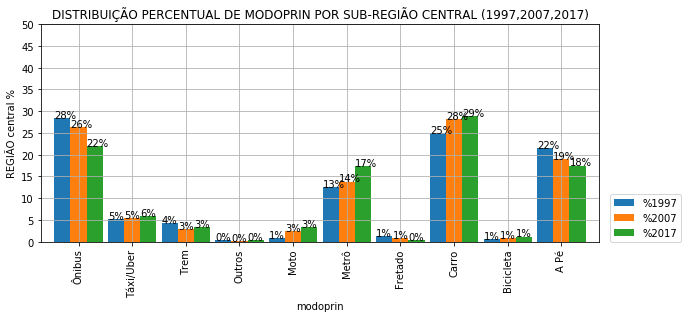

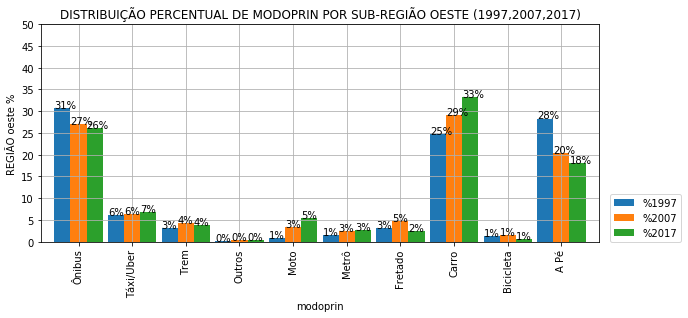

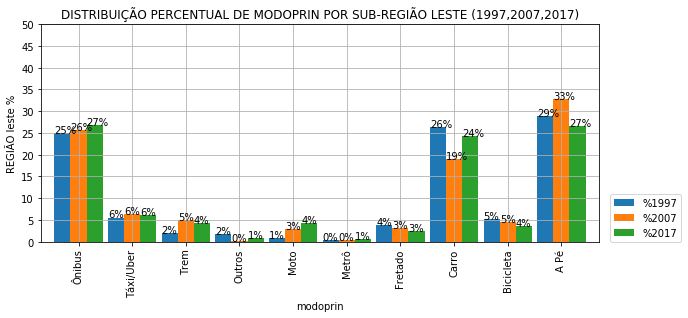

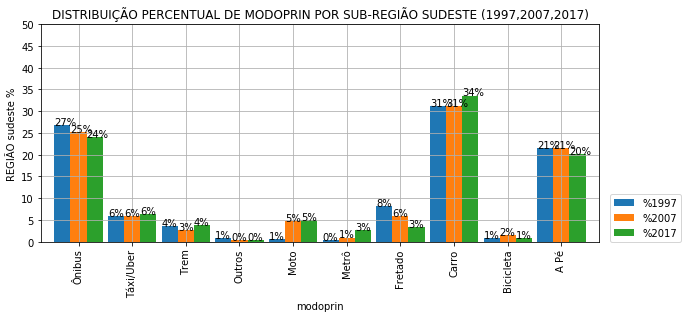

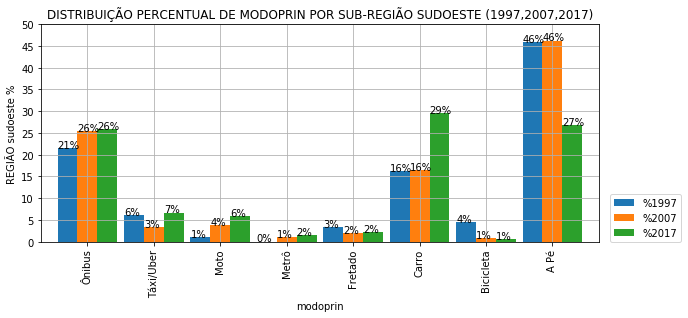

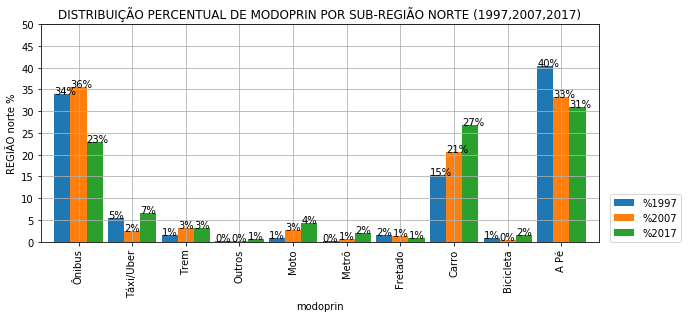

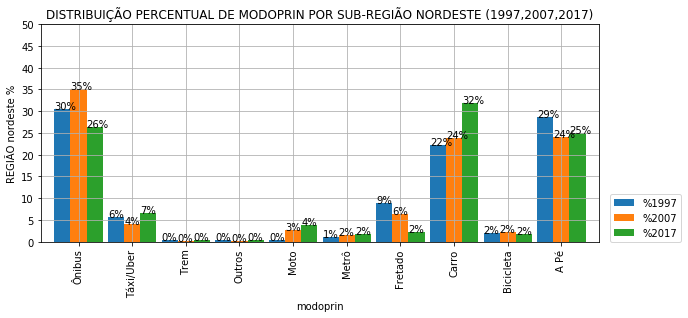

In [6]:

a = 0
for nivel in list(dftrabalho17['regiao_destino'].unique()):
    plt.figure(a)
    dftrabalho_criterior17 = dftrabalho17[['regiao_destino','modoprin','count']]
    dftrabalhotipcri17 = dftrabalho_criterior17[['regiao_destino','modoprin','count']][dftrabalho_criterior17['regiao_destino']== nivel]\
    .groupby(['regiao_destino','modoprin']).sum()
    dftrabalhotipcri17['%2017'] = (dftrabalhotipcri17['count']/dftrabalhotipcri17['count'].sum())*100

    dftrabalho_criterior07 = dftrabalho07[['regiao_destino','modoprin','count']]
    dftrabalhotipcri07 = dftrabalho_criterior07[['regiao_destino','modoprin','count']][dftrabalho_criterior07['regiao_destino']== nivel]\
    .groupby(['regiao_destino','modoprin']).sum()


    dftrabalhotipcri07['%2007'] = (dftrabalhotipcri07['count']/dftrabalhotipcri07['count'].sum())*100
    
    dftrabalho_criterior97 = dftrabalho97[['regiao_destino','modoprin','count']]
    dftrabalhotipcri97 = dftrabalho_criterior97[['modoprin','regiao_destino','count']][dftrabalho_criterior97['regiao_destino']== nivel]\
    .groupby(['regiao_destino','modoprin'])\
   .sum()
   
    dftrabalhotipcri97['%1997'] = (dftrabalhotipcri97['count']/dftrabalhotipcri97['count'].sum())*100
    dftrabalhotipcri = pd.merge((pd.merge(dftrabalhotipcri97[['%1997']],
                                  dftrabalhotipcri07[['%2007']],
                                     on = ['regiao_destino','modoprin'], how = 'inner')),
                        dftrabalhotipcri17[['%2017']], on = ['regiao_destino','modoprin'], how = 'inner')\
   .sort_values(by=[ 'modoprin','regiao_destino','%2017'],ascending=False).reset_index()
    

    if len(dftrabalhotipcri)!=0:    
       fig, ax = plt.subplots(1, 1)
       dftrabalhotipcri.plot.bar(x = 'modoprin',figsize = (10,4),ax =ax,grid = True,width = 0.9)     
       for p in ax.patches:
                  ax.annotate(str("%.0f" %p.get_height())+"%", (p.get_x(), p.get_height()))
       plt.legend(loc=[1.02, 0]) 
       plt.ylabel('REGIÃO {} %'.format(nivel))
       plt.yticks([0,5,10,15,20,25,30,35,40,45,50])
       #plt.xticks(rotation = 40)
       plt.title("DISTRIBUIÇÃO PERCENTUAL DE MODOPRIN POR SUB-REGIÃO {} (1997,2007,2017)".format(nivel.upper())) 
       a+=1

# COMPLEMENTO série de gráficos-6

<Figure size 432x288 with 0 Axes>

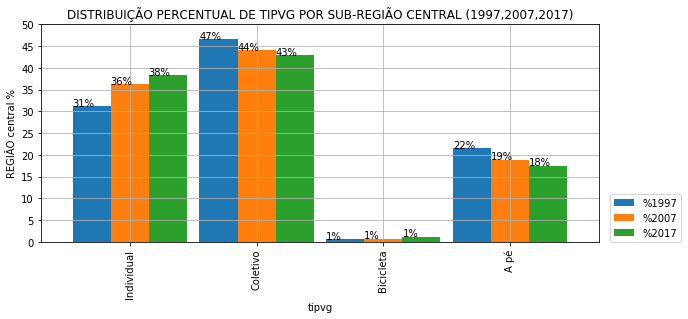

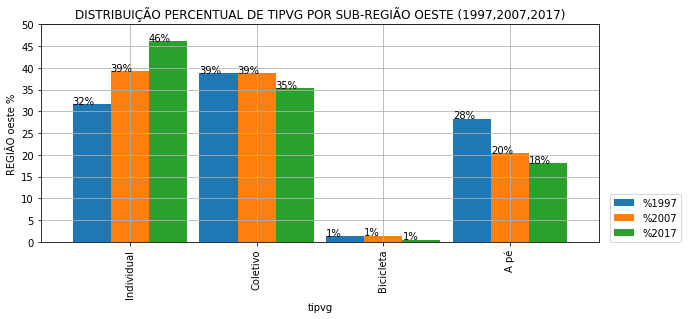

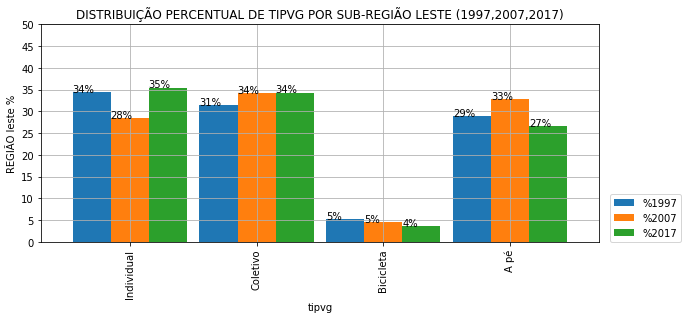

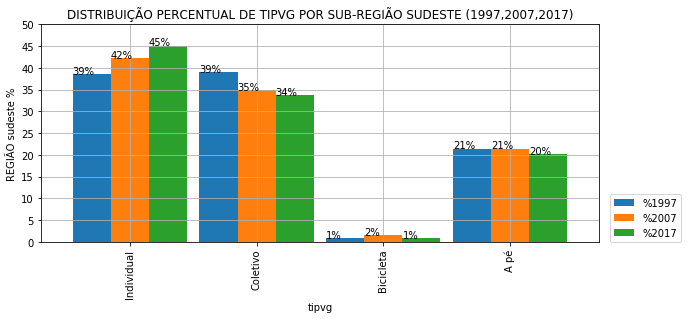

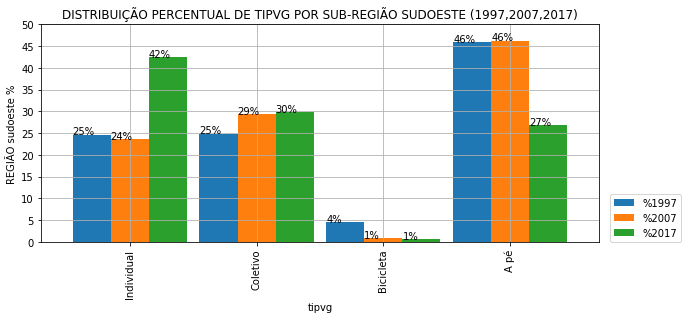

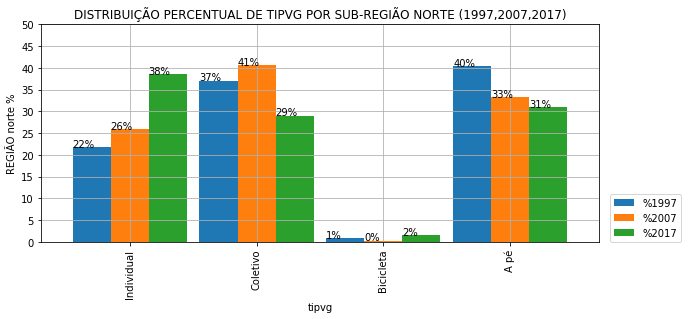

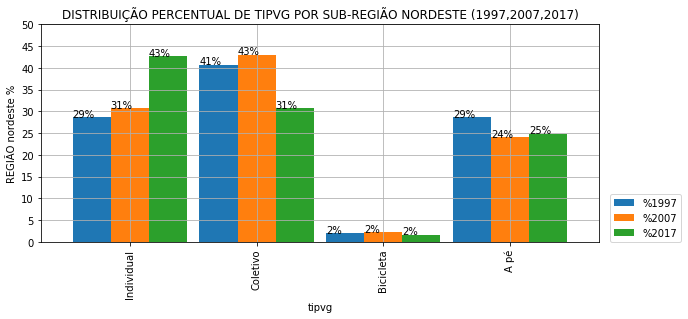

In [13]:

a = 0
for nivel in list(dftrabalho17['regiao_destino'].unique()):
    plt.figure(a)
    dftrabalho_criterior17 = dftrabalho17[['regiao_destino','tipvg','count']]
    dftrabalhotipcri17 = dftrabalho_criterior17[['regiao_destino','tipvg','count']][dftrabalho_criterior17['regiao_destino']== nivel]\
    .groupby(['regiao_destino','tipvg']).sum()
    dftrabalhotipcri17['%2017'] = (dftrabalhotipcri17['count']/dftrabalhotipcri17['count'].sum())*100

    dftrabalho_criterior07 = dftrabalho07[['regiao_destino','tipvg','count']]
    dftrabalhotipcri07 = dftrabalho_criterior07[['regiao_destino','tipvg','count']][dftrabalho_criterior07['regiao_destino']== nivel]\
    .groupby(['regiao_destino','tipvg']).sum()


    dftrabalhotipcri07['%2007'] = (dftrabalhotipcri07['count']/dftrabalhotipcri07['count'].sum())*100
    
    dftrabalho_criterior97 = dftrabalho97[['regiao_destino','tipvg','count']]
    dftrabalhotipcri97 = dftrabalho_criterior97[['tipvg','regiao_destino','count']][dftrabalho_criterior97['regiao_destino']== nivel]\
    .groupby(['regiao_destino','tipvg'])\
   .sum()
   
    dftrabalhotipcri97['%1997'] = (dftrabalhotipcri97['count']/dftrabalhotipcri97['count'].sum())*100
    dftrabalhotipcri = pd.merge((pd.merge(dftrabalhotipcri97[['%1997']],
                                  dftrabalhotipcri07[['%2007']],
                                     on = ['regiao_destino','tipvg'], how = 'inner')),
                        dftrabalhotipcri17[['%2017']], on = ['regiao_destino','tipvg'], how = 'inner')\
   .sort_values(by=[ 'tipvg','regiao_destino','%2017'],ascending=False).reset_index()
    

    if len(dftrabalhotipcri)!=0:    
       fig, ax = plt.subplots(1, 1)
       dftrabalhotipcri.plot.bar(x = 'tipvg',figsize = (10,4),ax =ax,grid = True,width = 0.9)     
       for p in ax.patches:
                  ax.annotate(str("%.0f" %p.get_height())+"%", (p.get_x(), p.get_height()))
       plt.legend(loc=[1.02, 0]) 
       plt.ylabel('REGIÃO {} %'.format(nivel))
       plt.yticks([0,5,10,15,20,25,30,35,40,45,50])
       #plt.xticks(rotation = 40)
       plt.title("DISTRIBUIÇÃO PERCENTUAL DE TIPVG POR SUB-REGIÃO {} (1997,2007,2017)".format(nivel.upper())) 
       a+=1

# gráfico 7-1
DISTRIBUIÇÃO PERCENTUAL DE TRANSPORTE COLETIVO POR SUB-REGIÃO (1997,2007,2017)

<Figure size 432x288 with 0 Axes>

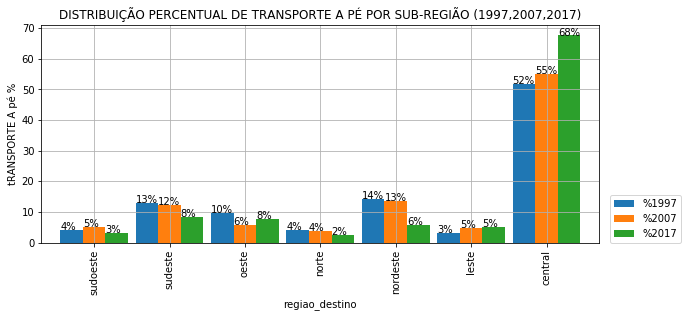

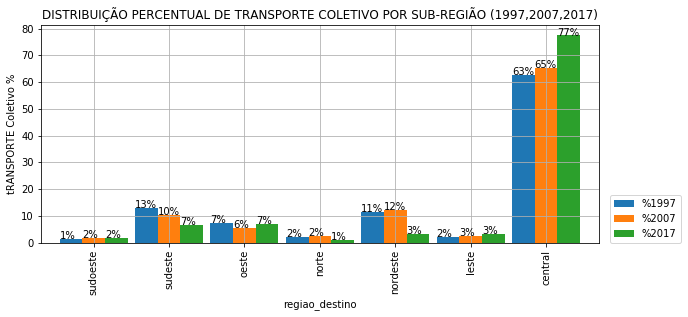

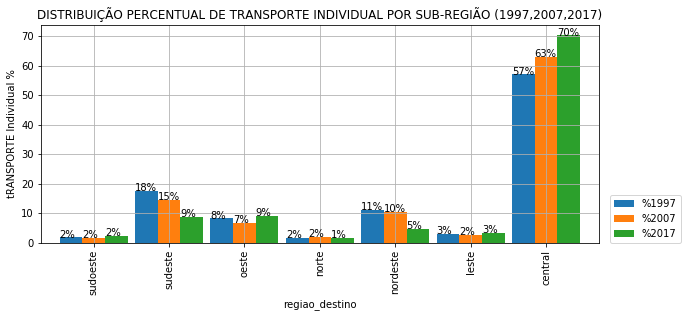

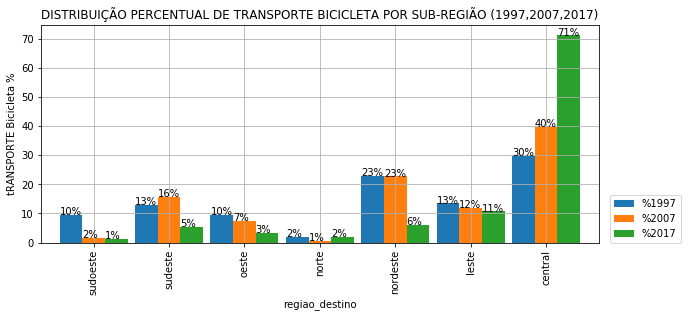

In [11]:

a = 0
for nivel in list(dftrabalho17['tipvg'].unique()):
    plt.figure(a)
    dftrabalho_criterior17 = dftrabalho17[['regiao_destino','tipvg','count']]
    dftrabalhotipcri17 = dftrabalho_criterior17[['regiao_destino','tipvg','count']][dftrabalho_criterior17['tipvg']== nivel]\
    .groupby(['regiao_destino','tipvg']).sum()
    dftrabalhotipcri17['%2017'] = (dftrabalhotipcri17['count']/dftrabalhotipcri17['count'].sum())*100

    dftrabalho_criterior07 = dftrabalho07[['regiao_destino','tipvg','count']]
    dftrabalhotipcri07 = dftrabalho_criterior07[['regiao_destino','tipvg','count']][dftrabalho_criterior07['tipvg']== nivel]\
    .groupby(['regiao_destino','tipvg']).sum()


    dftrabalhotipcri07['%2007'] = (dftrabalhotipcri07['count']/dftrabalhotipcri07['count'].sum())*100
    
    dftrabalho_criterior97 = dftrabalho97[['regiao_destino','tipvg','count']]
    dftrabalhotipcri97 = dftrabalho_criterior97[['tipvg','regiao_destino','count']][dftrabalho_criterior97['tipvg']== nivel]\
    .groupby(['regiao_destino','tipvg'])\
   .sum()
   
    dftrabalhotipcri97['%1997'] = (dftrabalhotipcri97['count']/dftrabalhotipcri97['count'].sum())*100
    dftrabalhotipcri = pd.merge((pd.merge(dftrabalhotipcri97[['%1997']],
                                  dftrabalhotipcri07[['%2007']],
                                     on = ['regiao_destino','tipvg'], how = 'inner')),
                        dftrabalhotipcri17[['%2017']], on = ['regiao_destino','tipvg'], how = 'inner')\
   .sort_values(by=[ 'tipvg','regiao_destino','%2017'],ascending=False).reset_index()
    

    if len(dftrabalhotipcri)!=0:    
       fig, ax = plt.subplots(1, 1)
       dftrabalhotipcri.plot.bar(x = 'regiao_destino',figsize = (10,4),ax =ax,grid = True,width = 0.9)     
       for p in ax.patches:
                  ax.annotate(str("%.0f" %p.get_height())+"%", (p.get_x(), p.get_height()))
       plt.legend(loc=[1.02, 0]) 
       plt.ylabel('tRANSPORTE {} %'.format(nivel))
       #plt.xticks(rotation = 40)
       plt.title("DISTRIBUIÇÃO PERCENTUAL DE TRANSPORTE {} POR SUB-REGIÃO (1997,2007,2017)".format(nivel.upper())) 
       a+=1
        

# GRÁFICO-7-2
DISTRIBUIÇÃO PERCENTUAL DE CONCENTRAÇÃO DE ATIVIDADE Trabalho POR SUB-REGIÃO DA RMSP  2017 2007 1997 

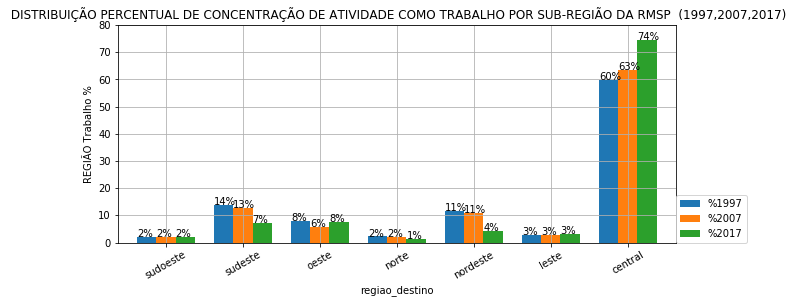

In [12]:

nivel = 'Trabalho'
dfmotivo17 = df17[['regiao_destino','motivo_no_destino_nome','count']]
dfmotivot17 = dfmotivo17[['regiao_destino','motivo_no_destino_nome','count']][dfmotivo17['motivo_no_destino_nome']== nivel]\
.groupby(['regiao_destino','motivo_no_destino_nome']).sum()
dfmotivot17['%2017'] = (dfmotivot17['count']/dfmotivot17['count'].sum())*100

dfmotivo07 = df07[['regiao_destino','motivo_no_destino_nome','count']]
dfmotivot07 = dfmotivo07[['regiao_destino','motivo_no_destino_nome','count']][dfmotivo07['motivo_no_destino_nome']== nivel]\
.groupby(['regiao_destino','motivo_no_destino_nome']).sum()


dfmotivot07['%2007'] = (dfmotivot07['count']/dfmotivot07['count'].sum())*100
 
dfmotivo97 = df97[['regiao_destino','motivo_no_destino_nome','count']]

dfmotivot97 = dfmotivo97[['motivo_no_destino_nome','regiao_destino','count']][dfmotivo97['motivo_no_destino_nome']== nivel]\
.groupby(['regiao_destino','motivo_no_destino_nome'])\
.sum()

dfmotivot97['%1997'] = (dfmotivot97['count']/dfmotivot97['count'].sum())*100
dfmotivot = pd.merge((pd.merge(dfmotivot97[['%1997']],
                               dfmotivot07[['%2007']],
                                  on = ['regiao_destino','motivo_no_destino_nome'], how = 'inner')),
                     dfmotivot17[['%2017']], on = ['regiao_destino','motivo_no_destino_nome'], how = 'inner')\
.sort_values(by=[ 'motivo_no_destino_nome','regiao_destino','%2017'],ascending=False).reset_index() 
if len(dfmotivot)!=0:    
     fig, ax = plt.subplots(1, 1)
     dfmotivot.plot.bar(x = 'regiao_destino',figsize = (10,4),ax =ax,grid = True,width = 0.75) 
     for p in ax.patches:
                  ax.annotate(str("%.0f" %p.get_height())+"%", (p.get_x(), p.get_height()))
     plt.legend(loc=[1, 0]) 
     plt.ylabel('REGIÃO {} %'.format(nivel))
     plt.yticks([0,10,20,30,40,50,60,70,80])
     plt.xticks(rotation = 30)
     plt.title(" DISTRIBUIÇÃO PERCENTUAL DE CONCENTRAÇÃO DE ATIVIDADE COMO {} POR SUB-REGIÃO DA RMSP  (1997,2007,2017)".format(nivel.upper())) 
     plt.show()